# Week 08, Graph2

- Data Load
- Network Analysis
  - small world
  - motif
  - graph role
  - community detection

# 1. data load

In [ ]:
! pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

## 1) data download
- football_graph : https://networkx.org/documentation/stable//auto_examples/graph/plot_football.html#sphx-glr-download-auto-examples-graph-plot-football-py

- 데이터 설명
    - 미국 대학 미식축구 (Schedule of Division I games for the 2000 season)
    - node : 팀, edge: 두 팀의 정규 시즌 게임 

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

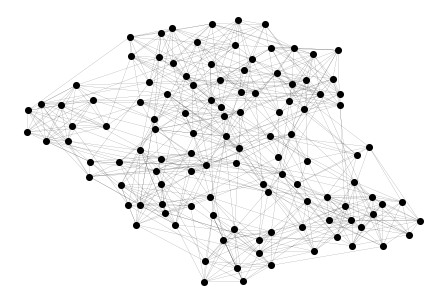

In [ ]:
import urllib.request as urllib
import io
import zipfile

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
g = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in g.degree():
    print(f"{n:20} {d:2}")

options = {
    "node_color": "black",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}
nx.draw(g, **options)
plt.show()

In [ ]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [ ]:
g.nodes.data()

NodeDataView({'BrighamYoung': {'value': 7}, 'FloridaState': {'value': 0}, 'Iowa': {'value': 2}, 'KansasState': {'value': 3}, 'NewMexico': {'value': 7}, 'TexasTech': {'value': 3}, 'PennState': {'value': 2}, 'SouthernCalifornia': {'value': 8}, 'ArizonaState': {'value': 8}, 'SanDiegoState': {'value': 7}, 'Baylor': {'value': 3}, 'NorthTexas': {'value': 10}, 'NorthernIllinois': {'value': 6}, 'Northwestern': {'value': 2}, 'WesternMichigan': {'value': 6}, 'Wisconsin': {'value': 2}, 'Wyoming': {'value': 7}, 'Auburn': {'value': 9}, 'Akron': {'value': 6}, 'VirginiaTech': {'value': 1}, 'Alabama': {'value': 9}, 'UCLA': {'value': 8}, 'Arizona': {'value': 8}, 'Utah': {'value': 7}, 'ArkansasState': {'value': 10}, 'NorthCarolinaState': {'value': 0}, 'BallState': {'value': 6}, 'Florida': {'value': 9}, 'BoiseState': {'value': 11}, 'BostonCollege': {'value': 1}, 'WestVirginia': {'value': 1}, 'BowlingGreenState': {'value': 6}, 'Michigan': {'value': 2}, 'Virginia': {'value': 0}, 'Buffalo': {'value': 6}, 'S

## 2) draw graph

## Node Centrality
- degree centrality : 연결된 node가 많을 수록 큼. nx.degree_centrality(g), nx.in_degree_centrality(g), nx.out_degree_centrality(g)
- closeness centrality : 모든 node와의 거리가 가까울 수록 큼. nx.closeness_centrality(g)
- betweenness centrality : 노드 간의 경로에 있을 수록 큼. nx.betweenness_centrality(g, normalized=True)
- eigenvector centrality : 큰 네트워크와 연결되있는 사람일 수록 큼. nx.eigenvector_centrality(g)

(-0.914247934495347, 0.6939930776596, -1.091768266651907, 0.9271335996900476)

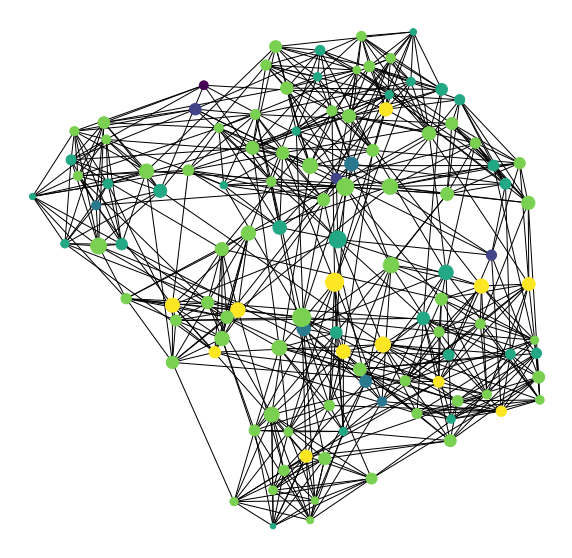

In [ ]:
#visualize the network such that the node color varies with Degree and node size with Betweenness Centrality.

pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g,normalized=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [ ]:
betCent = nx.betweenness_centrality(g,normalized=True)
sorted(betCent.items(), key = (lambda x: x[1]), reverse=True)

[('NotreDame', 0.03353295672662947),
 ('BrighamYoung', 0.03248994918389482),
 ('Navy', 0.029161053264223705),
 ('LouisianaTech', 0.02882282342077095),
 ('CentralMichigan', 0.02518680197086883),
 ('NewMexicoState', 0.024139419776449275),
 ('Cincinnati', 0.02383635493910067),
 ('KansasState', 0.023070098856845606),
 ('Alabama', 0.02304632173060802),
 ('Wyoming', 0.022213447427560148),
 ('UCLA', 0.022126807176414888),
 ('Wisconsin', 0.020895265847707085),
 ('MiamiOhio', 0.020755436736059025),
 ('ArkansasState', 0.02070022463158684),
 ('Indiana', 0.020498159932875414),
 ('Illinois', 0.020365117971128548),
 ('Tulsa', 0.020079489412026353),
 ('PennState', 0.01968128436895882),
 ('NevadaLasVegas', 0.01881941449900581),
 ('MiamiFlorida', 0.018287337810389524),
 ('MiddleTennesseeState', 0.01828620821279898),
 ('BoiseState', 0.01817205827359323),
 ('Houston', 0.017789451176510238),
 ('NorthCarolinaState', 0.01778327242869339),
 ('FloridaState', 0.017621112680095283),
 ('Northwestern', 0.01729136

(-0.8532347724522462,
 0.9934131803112103,
 -0.9263096391474571,
 1.091729030435593)

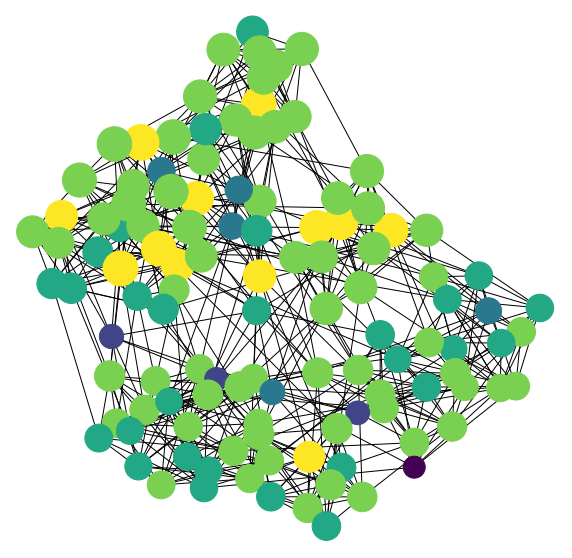

In [ ]:
#visualize the network such that the node color varies with Degree and node size with eigenvector Centrality.

pos = nx.spring_layout(g)
betCent = nx.eigenvector_centrality(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [ ]:
betCent = nx.eigenvector_centrality(g)
sorted(betCent.items(), key = (lambda x: x[1]), reverse=True)

[('Nevada', 0.12768299669980843),
 ('SouthernMethodist', 0.1225766153957418),
 ('Tulsa', 0.12128875621075212),
 ('SouthernCalifornia', 0.12072375014454016),
 ('SanJoseState', 0.11990229488965841),
 ('FresnoState', 0.11956811875565128),
 ('Hawaii', 0.11769509918671896),
 ('Rice', 0.117245996201321),
 ('TexasElPaso', 0.1164713615852209),
 ('Wisconsin', 0.11630287637595103),
 ('Iowa', 0.1162618994561207),
 ('TexasChristian', 0.1149430157363661),
 ('NevadaLasVegas', 0.11370347792666849),
 ('PennState', 0.11285571635753368),
 ('California', 0.11119849038833507),
 ('Arizona', 0.11032339044451622),
 ('Oregon', 0.11018711699727456),
 ('Stanford', 0.11006654691110676),
 ('OhioState', 0.1100525031978631),
 ('UCLA', 0.10996876923522056),
 ('Michigan', 0.10920929047838855),
 ('ArizonaState', 0.1078114599000231),
 ('SanDiegoState', 0.10653182761728126),
 ('BrighamYoung', 0.1065032293978512),
 ('MichiganState', 0.1065014852926181),
 ('Illinois', 0.10645041383760033),
 ('KansasState', 0.1062495448644

# 2. Network Analysis
- degree, centrality 등은 5주차 [lab]graph1 참고

## 1) Small world
- reference : https://networkx.org/documentation/stable/reference/algorithms/smallworld.html
- sigma = C/Cr / L/Lr
- C and L are respectively the average clustering coefficient and average shortest path length of G. 
- Cr and Lr are respectively the average clustering coefficient and average shortest path length of an equivalent random graph.
- A graph is commonly classified as small-world if sigma>1.

In [ ]:
from networkx.algorithms import smallworld as sw

In [ ]:
g_random = sw.random_reference(g, niter=20, seed=2021)
print(nx.info(g_random))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [ ]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [ ]:
C = nx.average_clustering(g)
L = nx.average_shortest_path_length(g)

In [ ]:
Cr = nx.average_clustering(g_random)
Lr = nx.average_shortest_path_length(g_random)

In [ ]:
A = (C / Cr)
B = (L / Lr)

In [ ]:
sigma =  A / B
sigma

4.643321690024574

In [ ]:
sw_sigma = sw.sigma(g, niter=20, seed=2021)
sw_sigma

4.539317382484467

## 2) motif

In [ ]:
# https://pypi.org/project/netsci/
! pip install netsci

     |████████████████████████████████| 450kB 5.9MB/s 


In [ ]:
import numpy as np
import netsci.visualization as nsv
import netsci.metrics.motifs as nsm

In [ ]:
# networkx to numpy
g_np = nx.convert_matrix.to_numpy_matrix(g,dtype=np.integer)
g_r_np = nx.convert_matrix.to_numpy_matrix(g_random,dtype=np.integer)

print(g_np.shape,g_r_np.shape)

(115, 115) (115, 115)


In [ ]:
# recurring : count subgraphs
f_real = nsm.motifs(g_np)[3:]
f_random = nsm.motifs(g_r_np)[3:]
print(f_real)
print(f_random)

[   0    0    0    0    0    0    0 3537    0    0    0    0  810]
[   0    0    0    0    0    0    0 5499    0    0    0    0  156]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


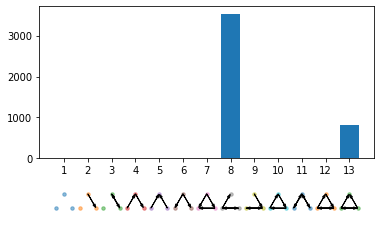

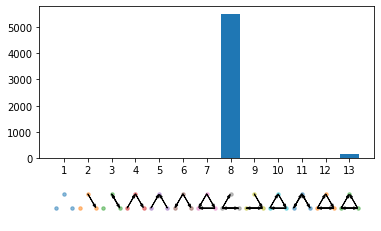

In [ ]:
# visualization of motifs
nsv.bar_motifs(f_real)
nsv.bar_motifs(f_random)

## 3) graph role
- reference: https://github.com/dkaslovsky/GraphRole
- https://pypi.org/project/graphrole/

In [ ]:
! pip install graphrole

In [ ]:
from pprint import pprint
import seaborn as sns

from graphrole import RecursiveFeatureExtractor, RoleExtractor

In [ ]:
# extract features
feature_extractor = RecursiveFeatureExtractor(g)
features = feature_extractor.extract_features()

In [ ]:
print(features)

                   degree(mean)(mean)  ...  internal_edges
AirForce                    10.868485  ...              33
Akron                       10.446606  ...              33
Alabama                     10.593595  ...              31
AlabamaBirmingham           10.541894  ...              23
Arizona                     10.926446  ...              39
...                               ...  ...             ...
WashingtonState             10.811662  ...              40
WestVirginia                10.714601  ...              37
WesternMichigan             10.542424  ...              27
Wisconsin                   11.047980  ...              35
Wyoming                     10.855096  ...              34

[115 rows x 12 columns]


In [ ]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

In [ ]:
print('\nNode role assignments:')
pprint(node_roles)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{'AirForce': 'role_4',
 'Akron': 'role_1',
 'Alabama': 'role_1',
 'AlabamaBirmingham': 'role_1',
 'Arizona': 'role_4',
 'ArizonaState': 'role_3',
 'Arkansas': 'role_1',
 'ArkansasState': 'role_1',
 'Army': 'role_1',
 'Auburn': 'role_1',
 'BallState': 'role_1',
 'Baylor': 'role_4',
 'BoiseState': 'role_1',
 'BostonCollege': 'role_1',
 'BowlingGreenState': 'role_1',
 'BrighamYoung': 'role_0',
 'Buffalo': 'role_1',
 'California': 'role_4',
 'CentralFlorida': 'role_1',
 'CentralMichigan': 'role_1',
 'Cincinnati': 'role_4',
 'Clemson': 'role_0',
 'Colorado': 'role_4',
 'ColoradoState': 'role_4',
 'Connecticut': 'role_5',
 'Duke': 'role_3',
 'EastCarolina': 'role_2',
 'EasternMichigan': 'role_1',
 'Florida': 'role_1',
 'FloridaState': 'role_0',
 'FresnoState': 'role_4',
 'Georgia': 'role_1',
 'GeorgiaTech': 'role_3',
 'Hawaii': 'role_4',
 'Houston': 'role_4',
 'Idaho': 'role_1',
 'Illinois': 'role_4',
 'Indiana': 'role_4',
 'Iowa': 'role_4',
 'IowaState': 'role_4',
 '

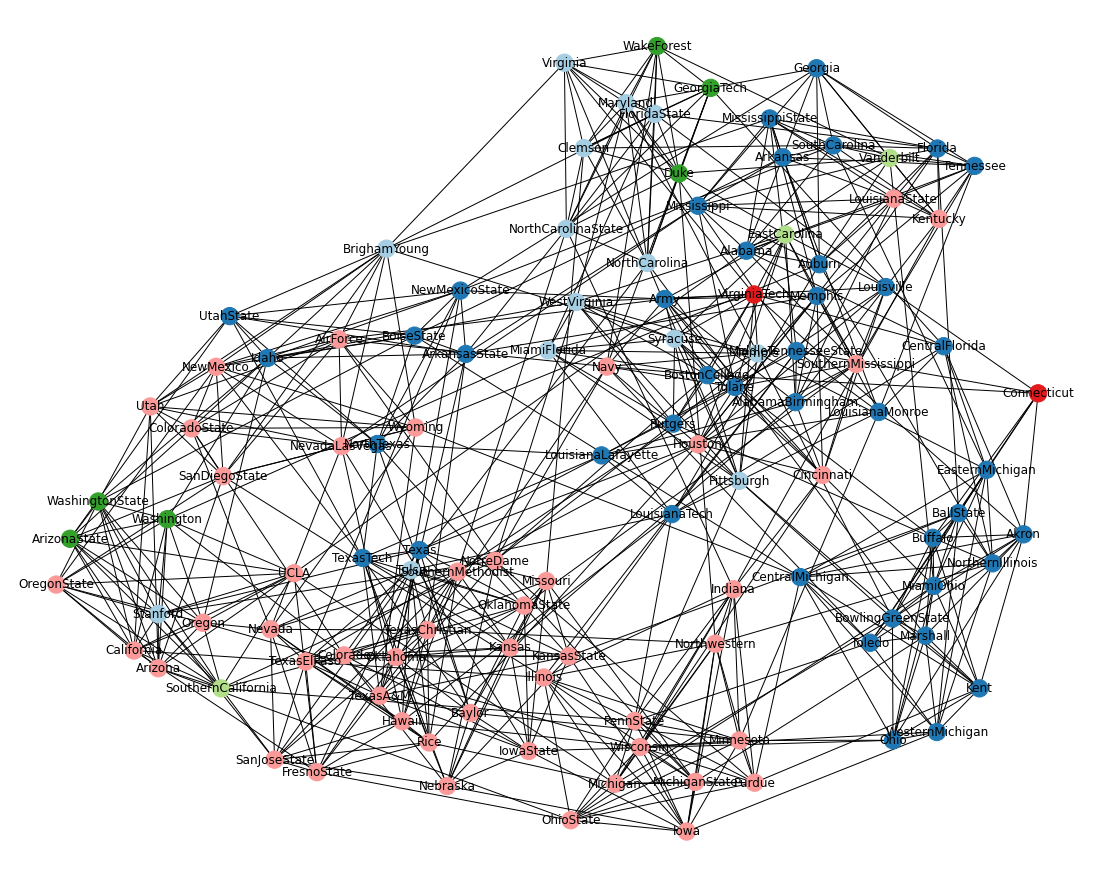

In [ ]:
# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in g.nodes]

# plot graph
plt.figure(figsize=(15,12))
nx.draw(
    g,
    pos=nx.spring_layout(g, seed=42),
    with_labels=True,
    node_color=node_colors,
)
plt.show()

## 4) Community Detection

In [ ]:
from networkx.algorithms import community
list(community.asyn_fluidc(g,k=2))

[{'AirForce',
  'Arizona',
  'ArizonaState',
  'ArkansasState',
  'Baylor',
  'BoiseState',
  'BrighamYoung',
  'California',
  'Colorado',
  'ColoradoState',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'IowaState',
  'Kansas',
  'KansasState',
  'Michigan',
  'MichiganState',
  'Minnesota',
  'Missouri',
  'Nebraska',
  'NevadaLasVegas',
  'NewMexico',
  'NewMexicoState',
  'NorthTexas',
  'Northwestern',
  'NotreDame',
  'OhioState',
  'Oklahoma',
  'OklahomaState',
  'Oregon',
  'OregonState',
  'PennState',
  'Purdue',
  'SanDiegoState',
  'SouthernCalifornia',
  'Stanford',
  'Texas',
  'TexasA&M',
  'TexasTech',
  'UCLA',
  'Utah',
  'UtahState',
  'Washington',
  'WashingtonState',
  'Wisconsin',
  'Wyoming'},
 {'Akron',
  'Alabama',
  'AlabamaBirmingham',
  'Arkansas',
  'Army',
  'Auburn',
  'BallState',
  'BostonCollege',
  'BowlingGreenState',
  'Buffalo',
  'CentralFlorida',
  'CentralMichigan',
  'Cincinnati',
  'Clemson',
  'Connecticut',
  'Duke',
  'EastCarolina',

In [ ]:
g.nodes.data()

NodeDataView({'BrighamYoung': {'value': 7}, 'FloridaState': {'value': 0}, 'Iowa': {'value': 2}, 'KansasState': {'value': 3}, 'NewMexico': {'value': 7}, 'TexasTech': {'value': 3}, 'PennState': {'value': 2}, 'SouthernCalifornia': {'value': 8}, 'ArizonaState': {'value': 8}, 'SanDiegoState': {'value': 7}, 'Baylor': {'value': 3}, 'NorthTexas': {'value': 10}, 'NorthernIllinois': {'value': 6}, 'Northwestern': {'value': 2}, 'WesternMichigan': {'value': 6}, 'Wisconsin': {'value': 2}, 'Wyoming': {'value': 7}, 'Auburn': {'value': 9}, 'Akron': {'value': 6}, 'VirginiaTech': {'value': 1}, 'Alabama': {'value': 9}, 'UCLA': {'value': 8}, 'Arizona': {'value': 8}, 'Utah': {'value': 7}, 'ArkansasState': {'value': 10}, 'NorthCarolinaState': {'value': 0}, 'BallState': {'value': 6}, 'Florida': {'value': 9}, 'BoiseState': {'value': 11}, 'BostonCollege': {'value': 1}, 'WestVirginia': {'value': 1}, 'BowlingGreenState': {'value': 6}, 'Michigan': {'value': 2}, 'Virginia': {'value': 0}, 'Buffalo': {'value': 6}, 'S